In [33]:
import pandas as pd
import numpy as np
import squarify
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('Clothes_fixed.csv')

In [3]:
df.head()

,Id,Category,SubCategory,ProductName,Description,Price_NPR,Material,Color,Brand,Season,Discount
0,8037,Accessories,Bags,"""Prada Striped Shell Belt Bag""","""One of Prada's most functional designs, this ...",564.0,Polyester,Blue,Prada,Summer,5%
1,13670,Accessories,Socks,"""Falke - Lhasa Wool And Cashmere-blend Socks -...","""Falke - Casual yet luxurious, Falke's dark na...",705.0,Cotton,Brown,Gucci,Winter,10%
2,13983,Suits,Tuxedos,"""peak lapel tuxedo suit jacket""","""White and black linen blend peak lapel tuxedo...",1158.0,Polyester,Brown,Louis Vuitton,Autumn,15%
3,12081,Accessories,Gloves,"""Thom Browne Navy 4-Bar Rib Gloves""","""Pair of rib knit cashmere gloves in navy. Sig...",1202.0,Wool,Brown,Zara,Spring,25%
4,15617,Accessories,Cufflinks,"""Alice Made This - Bayley Round Patina-brass C...","""Alice Made This - Made in the UK, these teal ...",1157.0,Leather,White,Prada,All Season,30%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           5000 non-null   int64  
 1   Category     4963 non-null   object 
 2   SubCategory  4963 non-null   object 
 3   ProductName  5000 non-null   object 
 4   Description  5000 non-null   object 
 5   Price_NPR    4999 non-null   float64
 6   Material     4999 non-null   object 
 7   Color        4999 non-null   object 
 8   Brand        4999 non-null   object 
 9   Season       4999 non-null   object 
 10  Discount     4999 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 429.8+ KB


In [5]:
df.describe

<bound method NDFrame.describe of          Id     Category   SubCategory  \
0      8037  Accessories          Bags   
1     13670  Accessories         Socks   
2     13983        Suits       Tuxedos   
3     12081  Accessories        Gloves   
4     15617  Accessories     Cufflinks   
...     ...          ...           ...   
4995  12341        Shoes      Sneakers   
4996   6385      Jewelry       Watches   
4997  13555  Accessories         Belts   
4998  10536   Activewear  Active Pants   
4999  10419   Activewear  Active Pants   

                                            ProductName  \
0                        "Prada Striped Shell Belt Bag"   
1     "Falke - Lhasa Wool And Cashmere-blend Socks -...   
2                       "peak lapel tuxedo suit jacket"   
3                   "Thom Browne Navy 4-Bar Rib Gloves"   
4     "Alice Made This - Bayley Round Patina-brass C...   
...                                                 ...   
4995                  "Future Leather Low Top Sn

In [6]:
df.isnull().sum()

Id              0
Category       37
SubCategory    37
ProductName     0
Description     0
Price_NPR       1
Material        1
Color           1
Brand           1
Season          1
Discount        1
dtype: int64

In [7]:
df.columns

Index(['Id', 'Category', 'SubCategory', 'ProductName', 'Description',
       'Price_NPR', 'Material', 'Color', 'Brand', 'Season', 'Discount'],
      dtype='object')

In [8]:
df.shape

(5000, 11)

In [9]:
#Data Cleaning process
cols = ["Category", "SubCategory", "Brand", "Color", "Material", "Season"]
df[cols] = df[cols].fillna("Unknown")

df['Price_NPR'] = df['Price_NPR'].fillna(df['Price_NPR'].median())
cols

['Category', 'SubCategory', 'Brand', 'Color', 'Material', 'Season']

In [10]:
df.columns

Index(['Id', 'Category', 'SubCategory', 'ProductName', 'Description',
       'Price_NPR', 'Material', 'Color', 'Brand', 'Season', 'Discount'],
      dtype='object')

In [11]:
# one hot encoder(feature encoding)
encoder = OneHotEncoder(handle_unknown="ignore")
X = encoder.fit_transform(df[["Category", "SubCategory", "Brand", "Color", "Material", "Season"]]
                         ).toarray()
encoder

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_categ

In [12]:
## recommendation/ cosine similarity
similarity = cosine_similarity(X)
item_index = 0
similar_items = similarity[item_index].argsort()[::-1][1:6]
print("Recommended similar items:")
print(df.loc[similar_items, ["ProductName", "Brand", "Price_NPR"]])

Recommended similar items:
                                            ProductName  Brand  Price_NPR
1700                  "Gucci Beige GG Supreme Belt Bag"  Prada      734.0
1535  "Eye/loewe/nature - Logo-woven Appliqué Canvas...  Prada      606.0
3280  "Native Union Clic Marble And Rubber Iphone X ...  Prada      580.0
4470  "Balenciaga - Rectangular Acetate Glasses - Me...  Gucci      647.0
3330  "Gucci - GG-print Felt Belt Bag - Mens - Beige...  Prada      692.0


In [13]:
# Grouping the products together using clustering(K-Means CLuster).
clusters = KMeans(n_clusters=3, random_state=42)
df.loc[:,"Cluster"] = clusters.fit_predict(X)
clusters

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [14]:
# showing the products from clusters if it shows the products or not.
cluster_id = df.loc[0,"Cluster"]
print("The products is available:")
print(df[df["Cluster"] == cluster_id][["ProductName", "Brand", "Category"]])

The products is available:
                                            ProductName          Brand  \
0                        "Prada Striped Shell Belt Bag"          Prada   
1     "Falke - Lhasa Wool And Cashmere-blend Socks -...          Gucci   
4     "Alice Made This - Bayley Round Patina-brass C...          Prada   
6              "Bode Off-White Sherpa Half-Zip Mittens"  Louis Vuitton   
9                           "geometric embroidered tie"          Gucci   
...                                                 ...            ...   
4984                                      "buckel belt"         Armani   
4987               "Men's Patterned Silk Pocket Square"           Zara   
4989  "Inis Meáin - Brioche-knitted Organic Pima-cot...         Armani   
4994    "Men's Polo Ralph Lauren Boulder Cotton Boxers"          Prada   
4997                                  "two tone braces"         Armani   

                     Category  
0                 Accessories  
1                 Ac

In [15]:
## showing patterns of categories and subcategories
association_data = df.groupby(["Category", "SubCategory"]).size().reset_index(name="Count")

print("Frequent category–subcategory pairs:")
print(association_data.sort_values("Count", ascending=False))


Frequent category–subcategory pairs:
                   Category          SubCategory  Count
3               Accessories              Eyewear    344
28                   Shirts             T-Shirts    336
13               Activewear         Active Pants    305
34                    Shoes       Slides/Slipper    299
25                    Pants               Shorts    247
35                    Shoes             Sneakers    224
15               Activewear  Sweatshirts/Hoodies    218
10              Accessories     Tech Accessories    187
31                    Shoes              Loafers    154
40  Underwear and Nightwear      Boxers & Briefs    149
37                    Suits              Tuxedos    140
33                    Shoes              Sandals    132
26                   Shirts                Polos    120
30                    Shoes               Derbys    115
7               Accessories       Pocket Squares    114
27                   Shirts               Shirts    113
42  Underwe

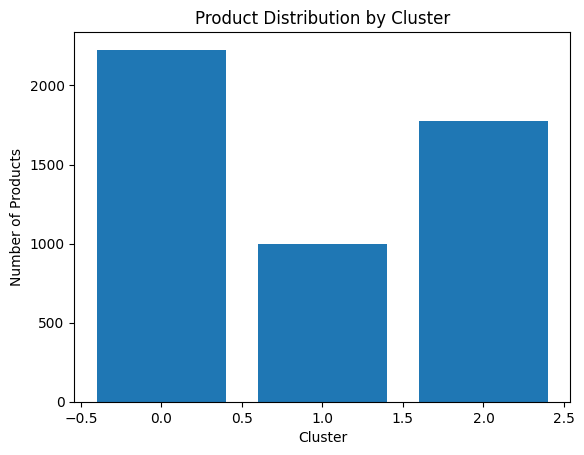

In [16]:
## visualizations 
# showing in the bar chart if the products per cluster is showed or not.
cluster_counts = df["Cluster"].value_counts().sort_index()

plt.figure()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel("Cluster")
plt.ylabel("Number of Products")
plt.title("Product Distribution by Cluster")
plt.show()


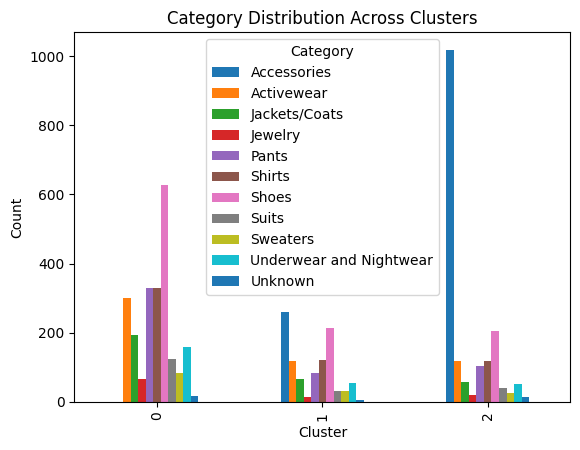

In [17]:
## checking between clusters and categories counts
cluster_category = df.groupby(["Cluster", "Category"]).size().unstack(fill_value=0)

cluster_category.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Category Distribution Across Clusters")
plt.show()


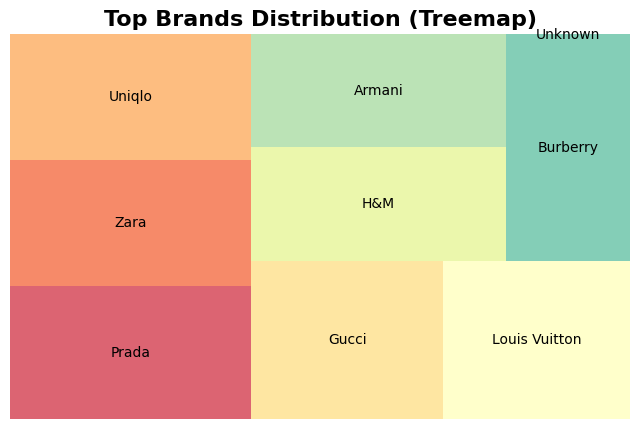

In [125]:
# Checking through the top brands distributions through visualisation
brand_counts = df['Brand'].value_counts().head(10)
plt.figure(figsize=(8, 5))
squarify.plot(sizes=brand_counts.values, 
              label=brand_counts.index, 
              alpha=0.8, 
              color=sns.color_palette("Spectral", len(brand_counts)),
              text_kwargs={'fontsize': 10})
plt.axis('off')
plt.title("Top Brands Distribution (Treemap)", fontsize=16, fontweight='bold')
plt.show()

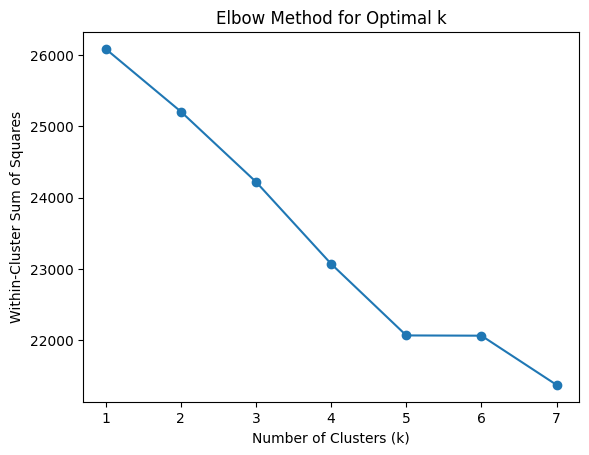

In [127]:
wcss = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Method for Optimal k")
plt.show()


In [129]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.0812524099031698


In [107]:
# Asking for the user input and recommending according to their search filter 
Brand = input("Enter preferred brand: ")
Color = input("Enter preferred color: ")
Season = input("Enter preferred season: ")
Material = input("Enter preferred material: ")
Price = float(input("Enter maximum price (NPR): "))
recommended_items = df.loc[similar_items, ["Brand", "Color", "Season", "Material", "Price_NPR"]]

user = {
    "Brand": Brand,
    "Color": Color,
    "Season": Season,
    "Material": Material,
    "Price_NPR": Price
}
search_filter = recommended_items[
    (recommended_items["Brand"].str.lower() == Brand.lower()) &
    (recommended_items["Color"].str.lower() == Color.lower()) &
    (recommended_items["Season"].str.lower() == Season.lower()) &
    (recommended_items["Material"].str.lower() == Material.lower()) &
    (recommended_items["Price_NPR"] <= Price)
]
user_df = pd.DataFrame([user])
print("\nUser Preferences:")
print(user)

print("\nRecommended Clothes:")
if len(search_filter) > 0:
    print(search_filter.head(5))  
else:
    print("No exact matches found. Showing similar items:")
    similar = recommended_items[
        (recommended_items["Season"].str.lower() == Season.lower()) &
        (recommended_items["Price_NPR"] <= Price)
    ].head(5)
    print(similar)
  



Enter preferred brand:  prada
Enter preferred color:  blue
Enter preferred season:  summer
Enter preferred material:  polyester
Enter maximum price (NPR):  1000



User Preferences:
{'Brand': 'prada', 'Color': 'blue', 'Season': 'summer', 'Material': 'polyester', 'Price_NPR': 1000.0}

Recommended Clothes:
No exact matches found. Showing similar items:
      Brand  Color  Season   Material  Price_NPR
1700  Prada  Beige  Summer  Polyester      734.0
1535  Prada   Blue  Summer       Wool      606.0
3280  Prada   Blue  Summer   Cashmere      580.0
4470  Gucci   Blue  Summer  Polyester      647.0
3330  Prada  Brown  Summer       Wool      692.0


In [ ]:
df.columns

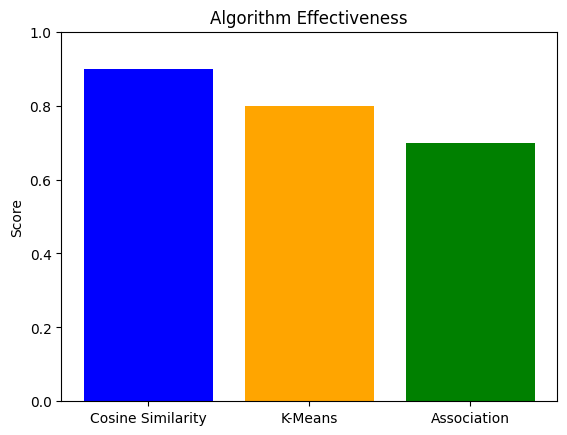

In [109]:
algorithms = ["Cosine Similarity", "K-Means", "Association"]
scores = [0.9, 0.8, 0.7]

plt.bar(algorithms, scores, color=['blue', 'orange', 'green'])
plt.title("Algorithm Effectiveness")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

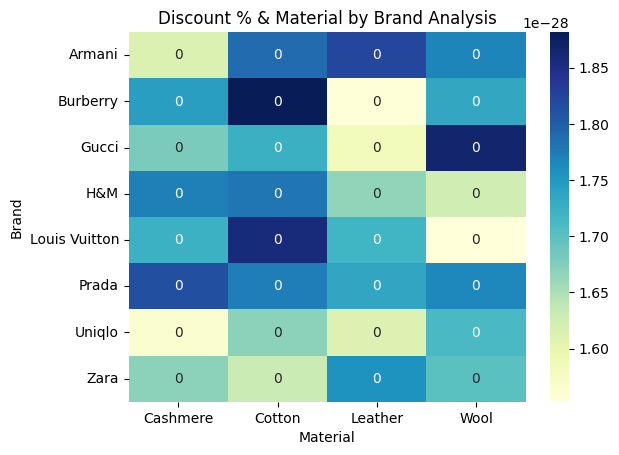

In [131]:
# The discount is shown according to the brands and materials
df['Discount'] = pd.to_numeric(df['Discount'].astype(str).str.replace('%', ''), errors='coerce') / 10
mat = ['Leather', 'Wool', 'Cotton', 'Cashmere']
top_brands = df['Brand'].value_counts().head(8).index
d = df[(df['Brand'].isin(top_brands)) & (df['Material'].isin(materials))]
heat_data = data.pivot_table('Discount', 'Brand', 'Material') * 100
heat_data = heat_data.fillna(0)
sns.heatmap(heat_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Discount % & Material by Brand Analysis')
plt.show()

<Figure size 1400x800 with 0 Axes>

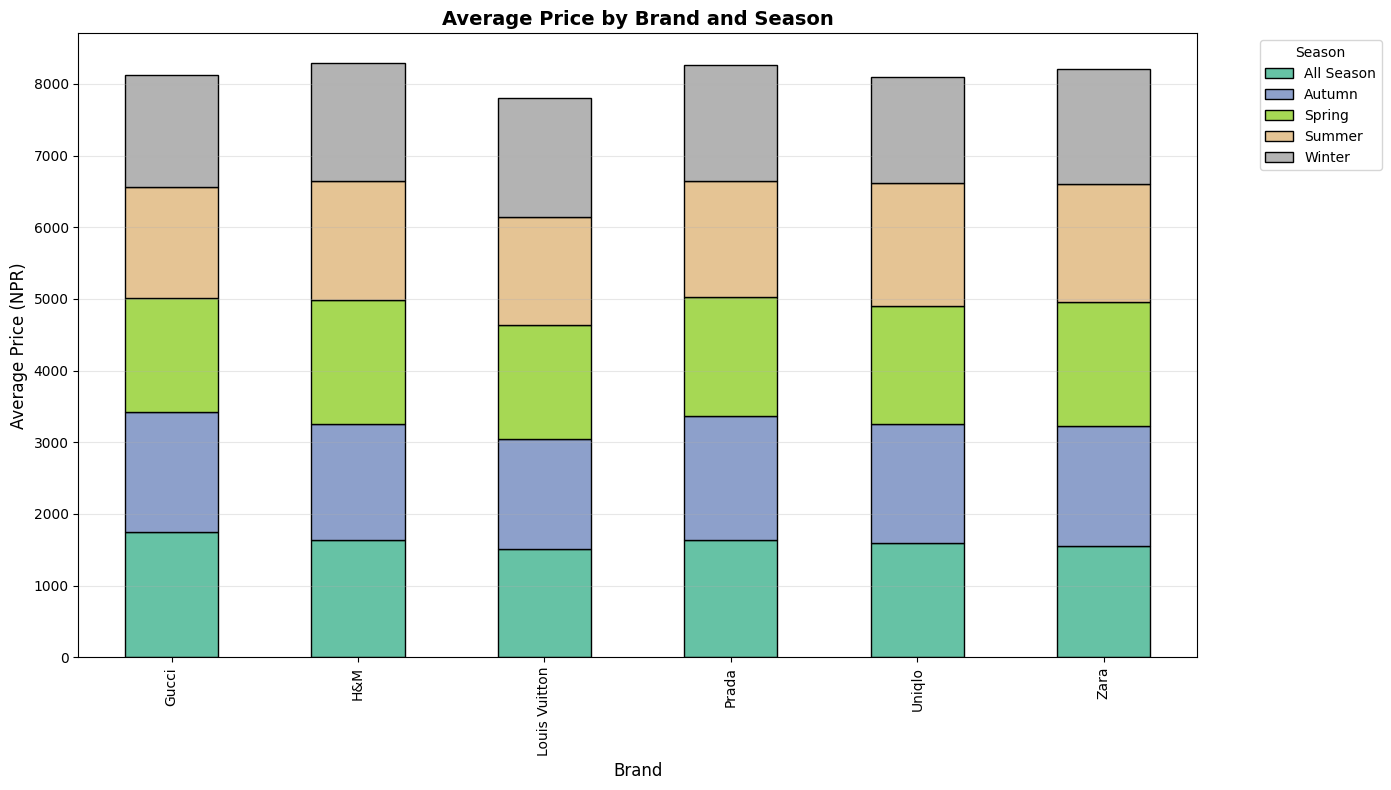

In [139]:
plt.figure(figsize=(14, 8))

top_brands = df['Brand'].value_counts().head(6).index
filtered_df = df[df['Brand'].isin(top_brands)]


grouped = filtered_df.groupby(['Brand', 'Season'])['Price_NPR'].mean().unstack()

grouped.plot(kind='bar', stacked=True, figsize=(14, 8), 
             colormap='Set2', edgecolor='black')
plt.title('Average Price by Brand and Season', fontsize=14, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price (NPR)', fontsize=12)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()